#  <center>   Baromètre de la science ouverte à l'Université Lumière Lyon 2  </center>
##  <center> <span style="color:red" > *Juin 2023* </span> </center> 
<center>  Université Lumière Lyon 2  </center>

- Envoi d'un fichier au format CSV au ministère qui contient 8985 DOI
- Le ministère me répond le 30 mai 2023 avec le fichier JSON: `bso-publications-latest_196917751_enriched.jsonl`
- Le notebook décrit la procédure d'importation de ce fichier.
- La section 1 décrit le code pour importer le fichier. Les sections 2 et 3 analysent les publications, et la section 4 analyse les APC.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import csv, json
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

## <span style="color:black" > 1 Importation des données </span>

In [2]:
with open("Data/Outputs/BSO3/bso-publications-latest_196917751_enriched.jsonl") as f:
    lines = f.read().splitlines()

In [3]:
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']

In [4]:
df_inter

,json_element
0,"{""all_ids"": [""doi10.1017/s1479591413000119"", ""..."
1,"{""all_ids"": [""doi10.3390/rel4020240"", ""natural..."
2,"{""all_ids"": [""doi10.7202/1023760ar"", ""natural2..."
3,"{""all_ids"": [""doi10.1016/j.amp.2011.09.016"", ""..."
4,"{""all_ids"": [""doi10.5565/rev/ensciencias.1530""..."
...,...
49400,"{""all_ids"": [""doi10.3917/arss.215.0072"", ""natu..."
49401,"{""all_ids"": [""halhalshs-01801507"", ""natural8fe..."
49402,"{""all_ids"": [""doi10.1038/s41598-020-75201-7"", ..."
49403,"{""all_ids"": [""doi10.1038/s41598-021-86989-3"", ..."


In [5]:
df_inter['json_element'].apply(json.loads)

0        {'all_ids': ['doi10.1017/s1479591413000119', '...
1        {'all_ids': ['doi10.3390/rel4020240', 'natural...
2        {'all_ids': ['doi10.7202/1023760ar', 'natural2...
3        {'all_ids': ['doi10.1016/j.amp.2011.09.016', '...
4        {'all_ids': ['doi10.5565/rev/ensciencias.1530'...
                               ...                        
49400    {'all_ids': ['doi10.3917/arss.215.0072', 'natu...
49401    {'all_ids': ['halhalshs-01801507', 'natural8fe...
49402    {'all_ids': ['doi10.1038/s41598-020-75201-7', ...
49403    {'all_ids': ['doi10.1038/s41598-021-86989-3', ...
49404    {'all_ids': ['doi10.7554/elife.65445', 'natura...
Name: json_element, Length: 49405, dtype: object

In [5]:
df_final = pd.json_normalize(df_inter['json_element'].apply(json.loads))

In [6]:
df_final.shape

(49405, 204)

**Le fichier JSON contient 49 405 lignes**

In [7]:
df_final.head(2)

,all_ids,bso_classification,bso_classification_journal_top_categ,bso_classification_method,bso_classification_pf_tags,bso_country,bso_country_corrected,bso_local_affiliations,datasource,doi,external_ids,genre,genre_raw,id,id_type,is_paratext,journal_issn_l,journal_issns,journal_name,natural_id,published_date,publisher,publisher_dissemination,publisher_group,publisher_normalized,sources,title,year,amount_apc_EUR,lang,publisher_in_bealls_list,journal_or_publisher_in_bealls_list,observation_dates,affiliations,french_affiliations_types,author_useful_rank_fr,author_useful_rank_countries,oa_details.2023Q1.snapshot_date,oa_details.2023Q1.observation_date,oa_details.2023Q1.is_oa,oa_details.2023Q1.journal_is_in_doaj,oa_details.2023Q1.journal_is_oa,oa_details.2023Q1.oa_host_type,oa_details.2023Q1.oa_colors,oa_details.2023Q1.oa_colors_with_priority_to_publisher,oa_details.2023Q1.repositories_concat,oa_details.2019.snapshot_date,oa_details.2019.observation_date,oa_details.2019.is_oa,oa_details.2019.journal_is_in_doaj,oa_details.2019.journal_is_oa,oa_details.2019.oa_host_type,oa_details.2019.oa_colors,oa_details.2019.oa_colors_with_priority_to_publisher,oa_details.2019.repositories_concat,oa_details.2020.snapshot_date,oa_details.2020.observation_date,oa_details.2020.is_oa,oa_details.2020.journal_is_in_doaj,oa_details.2020.journal_is_oa,oa_details.2020.oa_host_type,oa_details.2020.oa_colors,oa_details.2020.oa_colors_with_priority_to_publisher,oa_details.2020.repositories_concat,oa_details.2021Q4.snapshot_date,oa_details.2021Q4.observation_date,oa_details.2021Q4.is_oa,oa_details.2021Q4.journal_is_in_doaj,oa_details.2021Q4.journal_is_oa,oa_details.2021Q4.oa_host_type,oa_details.2021Q4.oa_colors,oa_details.2021Q4.oa_colors_with_priority_to_publisher,oa_details.2021Q4.repositories_concat,oa_details.2022Q4.snapshot_date,oa_details.2022Q4.observation_date,oa_details.2022Q4.is_oa,oa_details.2022Q4.journal_is_in_doaj,oa_details.2022Q4.journal_is_oa,oa_details.2022Q4.oa_host_type,oa_details.2022Q4.oa_colors,oa_details.2022Q4.oa_colors_with_priority_to_publisher,oa_details.2022Q4.repositories_concat,oa_details.2018.snapshot_date,oa_details.2018.observation_date,oa_details.2018.is_oa,oa_details.2018.journal_is_in_doaj,oa_details.2018.journal_is_oa,oa_details.2018.oa_host_type,oa_details.2018.oa_colors,oa_details.2018.oa_colors_with_priority_to_publisher,oa_details.2018.repositories_concat,has_apc,apc_source,amount_apc_openapc_EUR,count_apc_openapc_key,amount_apc_doaj,currency_apc_doaj,amount_apc_doaj_EUR,oa_details.2023Q1.unpaywall_oa_status,oa_details.2023Q1.licence_publisher,oa_details.2023Q1.licence_repositories,oa_details.2023Q1.repositories,oa_details.2023Q1.repositories_url,oa_details.2023Q1.repositories_pmh,oa_details.2023Q1.repositories_institution,oa_details.2023Q1.oa_locations,oa_details.2019.unpaywall_oa_status,oa_details.2019.licence_publisher,oa_details.2019.licence_repositories,oa_details.2019.repositories,oa_details.2019.repositories_url,oa_details.2019.repositories_pmh,oa_details.2019.repositories_institution,oa_details.2019.oa_locations,oa_details.2020.unpaywall_oa_status,oa_details.2020.licence_publisher,oa_details.2020.licence_repositories,oa_details.2020.repositories,oa_details.2020.repositories_url,oa_details.2020.repositories_pmh,oa_details.2020.repositories_institution,oa_details.2020.oa_locations,oa_details.2021Q4.unpaywall_oa_status,oa_details.2021Q4.licence_publisher,oa_details.2021Q4.licence_repositories,oa_details.2021Q4.repositories,oa_details.2021Q4.repositories_url,oa_details.2021Q4.repositories_pmh,oa_details.2021Q4.repositories_institution,oa_details.2021Q4.oa_locations,oa_details.2022Q4.unpaywall_oa_status,oa_details.2022Q4.licence_publisher,oa_details.2022Q4.licence_repositories,oa_details.2022Q4.repositories,oa_details.2022Q4.repositories_url,oa_details.2022Q4.repositories_pmh,oa_details.2022Q4.repositories_institution,oa_details.2022Q4.oa_locations,oa_details.2018.unpaywall_oa_status,oa_details.2018.licence_publish

In [9]:
### Vérification pour savoir si toutes les lignes contiennent l'identifiant Siren de l'établissement

affiliations = df_final["bso_local_affiliations"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
### Dataframe
affiliations_df = pd.DataFrame(affiliations)
affiliations_df.shape

(49405, 1)

In [10]:
affiliations_df.head()

,bso_local_affiliations
0,196917751
1,196917751
2,196917751
3,196917751
4,196917751


In [12]:
s = affiliations_df['bso_local_affiliations'].str.contains('196917751')

In [13]:
counts = s.value_counts()
counts

True    49405
Name: bso_local_affiliations, dtype: int64

**Toutes les lignes contiennent l'identifiant Siren de l'établissement (196917751), ce sont donc toutes des publications de Lyon 2**

In [39]:
# Les 49 405 documents possèdent un genre
df_final.genre.isnull().sum()

0

## <span style="color:black" > 2 Les publications avec DOI </span>

In [8]:
# Je garde uniquement les lignes qui ont des DOI

df_final_2 = df_final.dropna(subset='doi')
df_final_2.shape

(12216, 204)

**12 216 publications possèdent un DOI dans le fichier**

In [15]:
# Tous les DOI sont uniques
df_final_2['doi'].describe()

count                         12216
unique                        12216
top       10.1017/s1479591413000119
freq                              1
Name: doi, dtype: object

In [9]:
df_final_2.bso_classification.isnull().sum()

0

In [22]:
# Tous les DOI ont une datasource
df_final_2.datasource.isnull().sum()

0

In [25]:
# Regroupement par datasource

tot_doidatasource = df_final_2.groupby('datasource')['doi'].count()
tot_doidatasource

datasource
bso3_publications_dump         929
bso_local_007gfwn20.csv          1
bso_local_130002850FULL.csv      3
bso_local_130005457.csv        121
bso_local_130015332.csv         28
                              ... 
crossref_fr                     30
hal                            960
medline                         17
parsed_fr                      392
theses                           3
Name: doi, Length: 96, dtype: int64

In [17]:
# Tous les DOI ont un type de publication
df_final_2.genre.isnull().sum()

0

In [18]:
# Il y a 104 DOI sans titre
df_final_2.title.isnull().sum()

104

In [19]:
tot_doiyear = df_final_2.groupby('year')['doi'].count()
tot_doiyear

year
2013    1045
2014    1127
2015    1186
2016    1284
2017    1250
2018    1389
2019    1272
2020    1310
2021    1306
2022     952
2023      95
Name: doi, dtype: int64

### <span style="color:orange" > 2.1 Répartition des DOI par genre de la publication </span>

In [18]:
# Répartition des DOI par genre de la publication

tot_doitype = df_final_2.groupby('genre')['doi'].count()
perc_doitype = df_final_2.genre.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

tableau_0 = pd.DataFrame({'Total': tot_doitype,'Pourcentage': perc_doitype})
tableau_1 = tableau_0.sort_values("Total", ascending = False)
tableau_1

,Total,Pourcentage
journal-article,9398,76.9%
book-chapter,1501,12.3%
proceedings,855,7.0%
book,263,2.2%
other,183,1.5%
preprint,16,0.1%


### <span style="color:orange" > 2.2 Répartition des DOI par genre et année de la publication (pour comparaison avec le PAP 2023)</span>

In [27]:
tot_doitype_year = df_final_2.groupby(['year','genre'])['doi'].count()
tot_doitype_year

year  genre          
2013  book                18
      book-chapter       159
      journal-article    764
      other                9
      proceedings         95
                        ... 
2023  book                 2
      book-chapter         6
      journal-article     80
      other                4
      proceedings          3
Name: doi, Length: 61, dtype: int64

In [34]:
tableau_11 = pd.DataFrame(tot_doitype_year)
tableau_111 = tableau_11.reset_index()
tableau_111

,year,genre,doi
0,2013,book,18
1,2013,book-chapter,159
2,2013,journal-article,764
3,2013,other,9
4,2013,proceedings,95
...,...,...,...
56,2023,book,2
57,2023,book-chapter,6
58,2023,journal-article,80
59,2023,other,4


In [38]:
tableau_111.to_excel("Data/Outputs/BSO3/tableau_111.xlsx", index = False)

### <span style="color:orange" > 2.3 Répartition des DOI par discipline de la publication </span>

In [19]:
# Répartition des DOI par discipline de la publication

tot_doidisci = df_final_2.groupby('bso_classification')['doi'].count()
perc_doidisci = df_final_2.bso_classification.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

tableau_00 = pd.DataFrame({'Total': tot_doidisci,'Pourcentage': perc_doidisci})
tableau_2 = tableau_00.sort_values("Total", ascending = False)
tableau_2

,Total,Pourcentage
Social sciences,4011,32.8%
Humanities,3590,29.4%
Computer and \n information sciences,2646,21.7%
Biology (fond.),497,4.1%
"Earth, Ecology, \nEnergy and applied biology",445,3.6%
Medical research,436,3.6%
Mathematics,251,2.1%
Engineering,224,1.8%
"Physical sciences, Astronomy",77,0.6%
Chemistry,39,0.3%


### <span style="color:orange" > 2.4 Répartition des DOI par année de publication et date d'observation </span>

In [20]:
# On garde uniquement les DOI observés en décembre 2022 par UnpayWall

df_final_2_2022 = df_final_2.dropna(subset='oa_details.2022Q4.observation_date')
df_final_2_2022.shape

(12009, 204)

In [21]:
# On garde uniquement les DOI observés en janvier 2023

df_final_2_no2022 = df_final_2[df_final_2['oa_details.2022Q4.observation_date'].isna()]
df_final_2_no2022.shape

(207, 204)

In [22]:
dec_2022 = df_final_2_2022.groupby('genre')['doi'].count()
nodec_2022 = df_final_2_no2022.groupby('genre')['doi'].count()
concac = pd.DataFrame({'Décembre 2022': dec_2022,'Janvier 2023': nodec_2022})

In [23]:
concacdf = concac.reset_index()
concacdf

,genre,Décembre 2022,Janvier 2023
0,book,258,5.0
1,book-chapter,1478,23.0
2,journal-article,9237,161.0
3,other,175,8.0
4,preprint,16,NaN
5,proceedings,845,10.0


In [24]:
# On retire les DOI qui ont "other" comme genre des DOI observées en décembre 2022

df_final_2_2022_no_other = df_final_2_2022.loc[df_final_2_2022['genre'] != 'other']
df_final_2_2022_no_other.shape

(11834, 204)

In [25]:
# On retire les DOI qui ont "other" comme genre des DOI observées en janvier 2023

df_final_2_2022_no_other_2 = df_final_2_no2022.loc[df_final_2_no2022['genre'] != 'other']
df_final_2_2022_no_other_2.shape

(199, 204)

In [26]:
dec_2022_2 = df_final_2_2022_no_other.groupby('year')['doi'].count()
nodec_2022_2 = df_final_2_2022_no_other_2.groupby('year')['doi'].count()
concac_2 = pd.DataFrame({'Décembre 2022': dec_2022_2,'Janvier 2023': nodec_2022_2})

In [27]:
concac_2df = concac_2.reset_index()
concac_2df

,year,Décembre 2022,Janvier 2023
0,2013,1036,NaN
1,2014,1120,1.0
2,2015,1176,2.0
3,2016,1261,1.0
4,2017,1233,NaN
5,2018,1372,2.0
6,2019,1252,1.0
7,2020,1285,NaN
8,2021,1268,8.0
9,2022,819,105.0


## <span style="color:black" > 3 Les publications sans DOI </span>

In [40]:
# Je garde uniquement les lignes qui n'ont pas de DOI

df_final_3 = df_final[df_final['doi'].isna()]
df_final_3.shape

(37189, 204)

**37 189 publications n'ont pas de DOI dans le fichier**

In [41]:
# Tous les publications sans DOI ont une discipline
df_final_3.bso_classification.isnull().sum()

0

In [102]:
# Tous les publications sans DOI ont un type de publication
df_final_3.genre.isnull().sum()

0

In [42]:
# Tous les publications sans DOI ont un titre
df_final_3.title.isnull().sum()

0

In [31]:
df_final_3.groupby('year')['title'].count()

year
1985       5
1986      37
1987      49
1988      38
1989      51
1990      41
1991      52
1992      44
1993      46
1994      53
1995      38
1996      42
1997      70
1998      58
1999      70
2000     139
2001     113
2002     121
2003     118
2004     116
2005     117
2006     100
2007     141
2008      78
2009     154
2010     188
2011     201
2012     174
2013    3754
2014    3816
2015    3878
2016    4046
2017    4251
2018    4267
2019    3289
2020    2298
2021    2589
2022    2262
2023     284
2025       1
Name: title, dtype: int64

### <span style="color:orange" > 3.1 Répartition des titres par genre de la publication </span>

In [44]:
# Répartition des titres par genre de la publication

tot_titrestype = df_final_3.groupby('genre')['title'].count()
perc_titrestype = df_final_3.genre.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

tableau_000 = pd.DataFrame({'Total': tot_titrestype,'Pourcentage': perc_titrestype})
tableau_3 = tableau_000.sort_values("Total", ascending = False)
tableau_3

,Total,Pourcentage
other,13728,36.9%
book-chapter,7652,20.6%
journal-article,7038,18.9%
thesis,3844,10.3%
proceedings,2517,6.8%
book,2410,6.5%


### <span style="color:orange" > 3.2 Répartition des titres par genre et année de la publication (pour comparaison avec le PAP 2023)</span>

In [45]:
tot_titrestype_year = df_final_3.groupby(['year','genre'])['title'].count()
tot_titrestype_year

year  genre          
1985  thesis              5
1986  thesis             37
1987  thesis             49
1988  thesis             38
1989  thesis             51
                         ..
2023  book-chapter       86
      journal-article    68
      other              99
      proceedings         8
2025  book                1
Name: title, Length: 94, dtype: int64

In [46]:
tableau_33 = pd.DataFrame(tot_titrestype_year)
tableau_333 = tableau_33.reset_index()
tableau_333

,year,genre,title
0,1985,thesis,5
1,1986,thesis,37
2,1987,thesis,49
3,1988,thesis,38
4,1989,thesis,51
...,...,...,...
89,2023,book-chapter,86
90,2023,journal-article,68
91,2023,other,99
92,2023,proceedings,8


In [47]:
tableau_333.to_excel("Data/Outputs/BSO3/tableau_333.xlsx", index = False)

### <span style="color:orange" > 3.3 Répartition des titres par discipline de la publication </span>

In [31]:
# Répartition des titres par discipline de la publication

tot_titresdisci = df_final_3.groupby('bso_classification')['title'].count()
perc_titresdisci = df_final_3.bso_classification.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

tableau_0000 = pd.DataFrame({'Total': tot_titresdisci,'Pourcentage': perc_titresdisci})
tableau_4 = tableau_0000.sort_values("Total", ascending = False)
tableau_4

,Total,Pourcentage
Humanities,19875,53.4%
Social sciences,12608,33.9%
Computer and \n information sciences,2434,6.5%
"Earth, Ecology, \nEnergy and applied biology",772,2.1%
Mathematics,516,1.4%
Medical research,363,1.0%
Engineering,274,0.7%
Biology (fond.),264,0.7%
"Physical sciences, Astronomy",46,0.1%
Chemistry,33,0.1%


## <span style="color:black" > 4 Les APC </span>

On garde les 11 834 publications avec DOI, observées en décembre 2022, et qui n'ont pas "other" comme type de la publication.

In [32]:
### On compte le nombre de DOI qui n'ont pas de montant d'APC (montant d'APC valeur manquante)
df_final_2_2022_no_other.amount_apc_EUR.isnull().sum()

715

**715 publications n'ont pas de montant d'APC dans l'échantillon selectionnné (APC valeur manquante)**

In [55]:
#### Je retire les publications avec une valeur manquante pour la colonne des APC

df_final_apc = df_final_2_2022_no_other.dropna(subset='amount_apc_EUR')
df_final_apc.shape

(11119, 204)

In [56]:
### On compte le nombre de DOI qui ont une valeur nulle pour le montant des APC
count = (df_final_apc["amount_apc_EUR"] == 0).sum()
count

10411

**Parmi les 11 1119 DOI, 10 411 publications ont une valeur nulle pour le montant des APC**

In [57]:
#### Je retire les publications avec une valeur nulle pour la colonne des APC (montant des APC = 0)

df_final_apc_2 = df_final_apc.loc[df_final_apc["amount_apc_EUR"] != 0 ]
df_final_apc_2.shape

(708, 204)

**Il y a donc 708 publications avec un montant d'APC non nul**

In [36]:
#### Quelles sont les sources de ces APC?
df_final_apc_2.groupby('apc_source')['doi'].count()

apc_source
doaj                             53
openAPC                          96
openAPC_estimation_issn         189
openAPC_estimation_issn_year    370
Name: doi, dtype: int64

In [37]:
### Je prends uniquement les APC dont la source est le DOAJ
df_final_apc_doaj = df_final_apc_2.loc[df_final_apc_2["apc_source"] == "doaj" ]
df_final_apc_doaj.shape

(53, 204)

In [38]:
### Je prends uniquement les APC dont la source est OenAPC
df_final_apc_openapc = df_final_apc_2.loc[df_final_apc_2["apc_source"] == "openAPC" ]
df_final_apc_openapc.shape

(96, 204)

In [39]:
### Je sélectionne quelques variables d'intérêt
x = ['doi','journal_issns','journal_name','published_date','title', 'year','amount_apc_EUR', 'apc_source', 'bso_local_affiliations']

In [40]:
df_final_apc_doaj_2 = df_final_apc_doaj[x]
df_final_apc_openapc_2 = df_final_apc_openapc[x]

In [41]:
df_final_apc_openapc_2.head(2)

,doi,journal_issns,journal_name,published_date,title,year,amount_apc_EUR,apc_source,bso_local_affiliations
118,10.1371/journal.pone.0055009,1932-6203,PLoS ONE,2013-01-28T00:00:00,Some Structural Aspects of Language Are More S...,2013,1168.97,openAPC,[196917751]
170,10.1038/s41598-021-98894-w,2045-2322,Scientific Reports,2021-09-29T00:00:00,Sex and grooming as exchange commodities in fe...,2021,1933.69,openAPC,"[180036048, 196917751, 196917744]"


**Importation des données d'OpenAPC.**

On se rend sur le site la plateforme GitHub d'OpenAPC et on télécharge le fichier CSV `apc_de.csv` dans OpenAPC data set.

**Source:** https://github.com/OpenAPC/openapc-de/wiki/schema#openapc-data-set

In [49]:
### Importation des données d'OpenAPC
openapc_data = pd.read_csv("Data/Outputs/BSO3/apc_de.csv",  sep=",")
openapc_data.shape

(185978, 18)

In [50]:
openapc_data.head(2)

,institution,period,euro,doi,is_hybrid,publisher,journal_full_title,issn,issn_print,issn_electronic,issn_l,license_ref,indexed_in_crossref,pmid,pmcid,ut,url,doaj
0,Bamberg U,2013,1372.0,10.2147/jpr.s45097,False,Dove Medical Press Ltd.,Journal of Pain Research,1178-7090,NaN,1178-7090,1178-7090,http://creativecommons.org/licenses/by-nc/3.0/,True,23788838.0,PMC3684223,ut:000209528900045,NaN,True
1,Bamberg U,2013,960.0,10.3389/fpsyg.2013.00318,False,Frontiers Media SA,Frontiers in Psychology,1664-1078,NaN,1664-1078,1664-1078,NaN,True,23760550.0,PMC3669756,ut:000331039300001,NaN,True


In [51]:
### Vérification pour savoir si le DOI est dans la base d'OpenAPC
doi = ['10.1371/journal.pone.0055009']
filtre_doi = openapc_data[openapc_data['doi'].isin(doi)]
filtre_doi

,institution,period,euro,doi,is_hybrid,publisher,journal_full_title,issn,issn_print,issn_electronic,issn_l,license_ref,indexed_in_crossref,pmid,pmcid,ut,url,doaj
627,MPG,2013,1168.97,10.1371/journal.pone.0055009,False,Public Library of Science (PLoS),PLOS ONE,1932-6203,NaN,1932-6203,1932-6203,http://creativecommons.org/licenses/by/4.0/,True,23383035.0,PMC3557264,ut:000315211500045,NaN,True


### <span style="color:orange" > 4.1 Statistiques des APC par disciplines </span>

In [52]:
## Global
df_final_apc_2.groupby('genre')['amount_apc_EUR'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
journal-article,708.0,1654.419851,752.812448,35.0,1149.648665,1579.607381,1990.828398,4885.464167


In [53]:
## Par disciplines
stat_discipline = df_final_apc_2.groupby('bso_classification')['amount_apc_EUR'].describe()

In [54]:
stat_discipline.reset_index().sort_values("count", ascending = False)

,bso_classification,count,mean,std,min,25%,50%,75%,max
0,Biology (fond.),132.0,1886.712949,809.616711,220.000000,1418.528372,1786.302508,2149.499926,4885.464167
9,Social sciences,127.0,1605.975896,823.615485,35.000000,1071.610019,1575.519370,2115.691273,4503.852521
2,Computer and \n information sciences,115.0,1428.404260,611.331926,290.000000,1050.000000,1433.711923,1672.172353,4395.898361
5,Humanities,108.0,1602.681193,751.025148,35.000000,1114.386925,1534.814656,2022.902054,4215.000000
7,Medical research,100.0,1890.978715,663.866160,131.152319,1529.038980,1783.272201,2157.986816,4765.843846
3,"Earth, Ecology, \nEnergy and applied biology",54.0,1574.177912,622.373126,347.762157,1122.841359,1505.827128,1891.563017,3030.291818
6,Mathematics,25.0,1501.619723,1047.406699,424.630000,1023.602273,1197.567928,1586.674194,4646.809211
4,Engineering,24.0,1555.966162,470.481969,500.000000,1389.832947,1609.587915,1702.283437,2620.000000
8,"Physical sciences, Astronomy",18.0,1330.292551,402.829701,342.336333,1084.236953,1385.000000,1605.837896,1918.586087
1,Chemistry,5.0,1607.144481,1203.463884,400.000000,1144.070699,1420.421163,1448.719565,3622.510976


### <span style="color:orange" > 4.2 Graphiques </span>

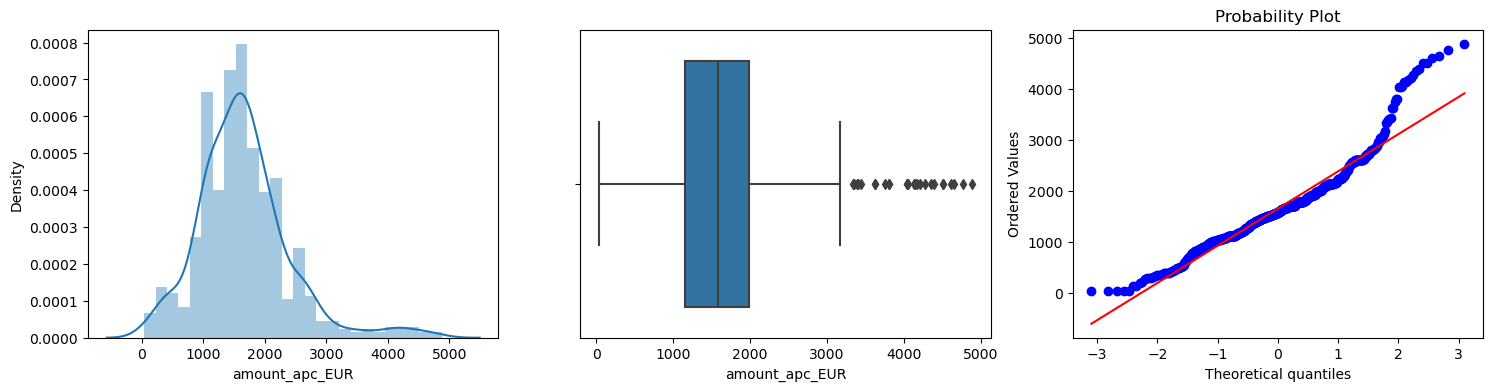

In [58]:
#display(df_final_apc_2.amount_apc_EUR.describe())
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
sns.distplot(df_final_apc_2.amount_apc_EUR, ax=ax[0])
sns.boxplot(df_final_apc_2.amount_apc_EUR, ax=ax[1])
stats.probplot(df_final_apc_2.amount_apc_EUR, plot=ax[2])
plt.savefig('Distribution APC.png', dpi=400)
plt.show()